<h1>Pre-Processing</h1>

In [2]:
from Helper import *
preProcessor=PreProcessor()
graphs=GraphBuilder()
modelBuilder = ModelBuilder()

In [2]:
df=preProcessor.readFile('security.csv')

In [3]:
df['TIPO'] = preProcessor.encodeTIPO(df)

In [4]:
preProcessor.showHead(df)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
0,B0_113,17,6,ISO-8859-1,nginx,None,162,US,California,1997,...,3,3812,0,39,37,18784,4380,39,8,0
1,B0_403,17,6,UTF-8,Apache/2.2.0 (Fedora),"max-age=269, must-revalidate",124140,US,Texas,1996,...,5,4278,0,61,62,129889,4586,61,4,0
2,B0_2064,18,7,UTF-8,nginx,None,11260,CN,Shanxi,2017,...,9,894,0,11,13,838,894,11,0,0
3,B0_462,18,6,iso-8859-1,Apache/2,None,345,US,Colorado,2002,...,3,1189,0,14,13,8559,1327,14,2,0
4,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,None,324,US,Florida,1997,...,0,0,0,0,0,0,0,0,0,0


In [57]:
preProcessor.showTail(df)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
1606,M4_48,194,16,UTF-8,Apache,"no-store, no-cache, must-revalidate, post-chec...",11260,ES,Barcelona,2008,...,0,0,0,0,3,186,0,0,0,1
1607,M4_41,198,17,UTF-8,Apache,"no-store, no-cache, must-revalidate, post-chec...",11260,ES,Barcelona,2008,...,0,0,0,0,2,124,0,0,0,1
1608,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),"private, max-age=0, must-revalidate",8904,US,Florida,1999,...,6,6631,0,87,89,132181,6945,87,4,0
1609,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,None,11260,US,California,1998,...,0,0,0,0,0,0,0,0,0,0
1610,B0_676,249,40,utf-8,Microsoft-IIS/8.5,"no-cache, no-store, must-revalidate",24435,US,Wisconsin,2008,...,11,2314,0,25,28,3039,2776,25,6,0


In [58]:
preProcessor.describeTheDataFrame(df)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CACHE_CONTROL,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,...,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
count,1611,1611.000000,1611.000000,1611,1611,1611,1611.000000,1611,1611,1611.000000,...,1611.000000,1.611000e+03,1611.0,1611.000000,1611.000000,1.611000e+03,1.611000e+03,1611.000000,1611.000000,1611.000000
unique,1611,NaN,NaN,9,118,142,NaN,43,160,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_113,NaN,NaN,UTF-8,Apache/2.2.29 (Unix),None,NaN,US,California,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,597,286,703,NaN,1191,450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,58.051521,11.187461,NaN,NaN,NaN,11188.708876,NaN,NaN,2001.658597,...,2.965239,3.071903e+03,0.0,17.787089,17.998138,1.483835e+04,3.237232e+03,17.787089,2.155804,0.098076
std,NaN,28.162183,4.700296,NaN,NaN,NaN,22997.397319,NaN,NaN,5.218352,...,3.390895,5.892612e+04,0.0,41.655940,45.957305,6.583941e+04,5.892877e+04,41.655940,2.883439,0.297509
min,NaN,17.000000,6.000000,NaN,NaN,NaN,0.000000,NaN,NaN,1990.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,NaN,1825.500000,NaN,NaN,1997.000000,...,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,50.000000,10.000000,NaN,NaN,NaN,11260.000000,NaN,NaN,2001.000000,...,2.000000,6.180000e+02,0.0,7.000000,8.000000,5.080000e+02,6.300000e+02,7.000000,0.000000,0.000000
75%,NaN,69.000000,13.000000,NaN,NaN,NaN,11260.000000,NaN,NaN,2005.000000,...,5.000000,2.314000e+03,0.0,26.000000,24.000000,9.661500e+03,2.635500e+03,26.000000,4.000000,0.000000


<AxesSubplot:>

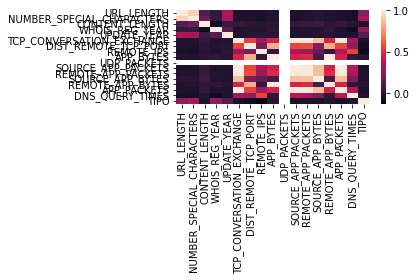

In [59]:
graphs.buildHeatMap(df)

<AxesSubplot:>

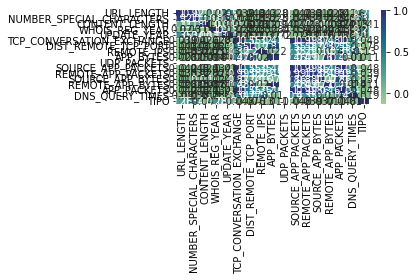

In [60]:
graphs.buildCorrHeatMap(df,['URL', 'CHARSET', 'SERVER'])

In [61]:
corr_matrix = preProcessor.getCorrMatrix(df)
corr_matrix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REG_YEAR,UPDATE_YEAR,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
URL_LENGTH,1.000000,0.923867,0.106518,0.019954,0.347487,-0.038982,-0.043474,-0.042785,-0.028107,NaN,-0.042124,-0.033382,-0.012234,-0.028302,-0.042124,-0.059653,0.260268
NUMBER_SPECIAL_CHARACTERS,0.923867,1.000000,0.176811,0.031175,0.343286,-0.039789,-0.043337,-0.052201,-0.024792,NaN,-0.042799,-0.032111,-0.011979,-0.024995,-0.042799,-0.057792,0.338182
CONTENT_LENGTH,0.106518,0.176811,1.000000,-0.089554,0.042546,0.025815,-0.002604,-0.011745,0.000941,NaN,0.023925,0.028348,0.048727,0.000875,0.023925,-0.017812,-0.041166
WHOIS_REG_YEAR,0.019954,0.031175,-0.089554,1.000000,0.125286,-0.028330,-0.023136,-0.031701,0.008389,NaN,-0.033874,-0.024161,-0.023849,0.008094,-0.033874,-0.087689,0.278828
UPDATE_YEAR,0.347487,0.343286,0.042546,0.125286,1.000000,-0.026258,-0.010985,-0.003743,-0.007178,NaN,-0.028207,-0.030247,-0.026118,-0.007305,-0.028207,-0.039372,0.124868
TCP_CONVERSATION_EXCHANGE,-0.038982,-0.039789,0.025815,-0.028330,-0.026258,1.000000,0.550034,0.317082,0.474938,NaN,0.997861,0.992214,0.872176,0.476191,0.997861,0.338818,-0.047517
DIST_REMOTE_TCP_PORT,-0.043474,-0.043337,-0.002604,-0.023136,-0.010985,0.550034,1.000000,0.204787,0.819708,NaN,0.554720,0.580605,0.236281,0.820664,0.554720,0.270697,-0.076384
REMOTE_IPS,-0.042785,-0.052201,-0.011745,-0.031701,-0.003743,0.317082,0.204787,1.000000,0.022200,NaN,0.347195,0.292921,0.159821,0.024260,0.347195,0.548653,-0.129607
APP_BYTES,-0.028107,-0.024792,0.000941,0.008389,-0.007178,0.474938,0.819708,0.022200,1.000000,NaN,0.463458,0.492514,0.076377,0.999993,0.463458,0.010154,-0.011269
UDP_PACKETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
upper = preProcessor.getUpperCorrMatrix(df)
upper

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REG_YEAR,UPDATE_YEAR,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,UDP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,TIPO
URL_LENGTH,NaN,0.923867,0.106518,0.019954,0.347487,-0.038982,-0.043474,-0.042785,-0.028107,NaN,-0.042124,-0.033382,-0.012234,-0.028302,-0.042124,-0.059653,0.260268
NUMBER_SPECIAL_CHARACTERS,NaN,NaN,0.176811,0.031175,0.343286,-0.039789,-0.043337,-0.052201,-0.024792,NaN,-0.042799,-0.032111,-0.011979,-0.024995,-0.042799,-0.057792,0.338182
CONTENT_LENGTH,NaN,NaN,NaN,-0.089554,0.042546,0.025815,-0.002604,-0.011745,0.000941,NaN,0.023925,0.028348,0.048727,0.000875,0.023925,-0.017812,-0.041166
WHOIS_REG_YEAR,NaN,NaN,NaN,NaN,0.125286,-0.028330,-0.023136,-0.031701,0.008389,NaN,-0.033874,-0.024161,-0.023849,0.008094,-0.033874,-0.087689,0.278828
UPDATE_YEAR,NaN,NaN,NaN,NaN,NaN,-0.026258,-0.010985,-0.003743,-0.007178,NaN,-0.028207,-0.030247,-0.026118,-0.007305,-0.028207,-0.039372,0.124868
TCP_CONVERSATION_EXCHANGE,NaN,NaN,NaN,NaN,NaN,NaN,0.550034,0.317082,0.474938,NaN,0.997861,0.992214,0.872176,0.476191,0.997861,0.338818,-0.047517
DIST_REMOTE_TCP_PORT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204787,0.819708,NaN,0.554720,0.580605,0.236281,0.820664,0.554720,0.270697,-0.076384
REMOTE_IPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022200,NaN,0.347195,0.292921,0.159821,0.024260,0.347195,0.548653,-0.129607
APP_BYTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463458,0.492514,0.076377,0.999993,0.463458,0.010154,-0.011269
UDP_PACKETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

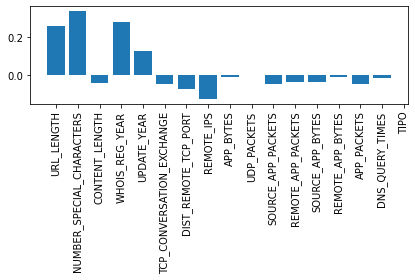

In [63]:
graphs.buildBarPlot(upper.columns,list(upper['TIPO']))

In [64]:
highCorrList = preProcessor.getHighCorrColumns(upper)
highCorrList
# URL_LENGTH                   0.260268
# NUMBER_SPECIAL_CHARACTERS    0.338182
# WHOIS_REG_YEAR               0.278828
# UPDATE_YEAR                  0.124868
# REMOTE_IPS                  -0.129607

['URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'WHOIS_REG_YEAR',
 'UPDATE_YEAR',
 'REMOTE_IPS']

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

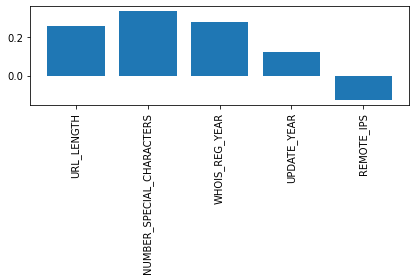

In [65]:
yList = []
for i in highCorrList:
    yList.append(upper['TIPO'][i])
graphs.buildBarPlot(highCorrList, yList)

In [66]:
to_drop = preProcessor.getColumnsToDrop(upper,highCorrList)
to_drop

['CONTENT_LENGTH',
 'TCP_CONVERSATION_EXCHANGE',
 'DIST_REMOTE_TCP_PORT',
 'APP_BYTES',
 'UDP_PACKETS',
 'SOURCE_APP_PACKETS',
 'REMOTE_APP_PACKETS',
 'SOURCE_APP_BYTES',
 'REMOTE_APP_BYTES',
 'APP_PACKETS',
 'DNS_QUERY_TIMES']

In [67]:
processedDf = preProcessor.dropColumns(df,to_drop)
# Dropping few non numeric columns manually
processedDf = preProcessor.dropColumns(processedDf,['URL','CHARSET','SERVER','CACHE_CONTROL'])

In [68]:
print('Data shape: ', df.shape)
print('Size of the data set', processedDf.shape)

Data shape:  (1611, 24)
Size of the data set (1611, 9)


In [69]:
preProcessor.showHead(processedDf)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,UPDATE_YEAR,DOMAIN_NAME,REMOTE_IPS,TIPO
0,17,6,US,California,1997,2013,aste.org,3,0
1,17,6,US,Texas,1996,2017,kksf.com,5,0
2,18,7,CN,Shanxi,2017,2017,gl-ks.org,9,0
3,18,6,US,Colorado,2002,2016,wsims.com,3,0
4,19,6,US,Florida,1997,2017,hfcuvt.com,0,0


In [70]:
preProcessor.showTail(processedDf)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,WHOIS_COUNTRY,WHOIS_STATE_CITY,WHOIS_REG_YEAR,UPDATE_YEAR,DOMAIN_NAME,REMOTE_IPS,TIPO
1606,194,16,ES,Barcelona,2008,2017,coleyglesias.com,0,1
1607,198,17,ES,Barcelona,2008,2017,coleyglesias.com,0,1
1608,201,34,US,Florida,1999,2017,berkeleydailyplanet.com,6,0
1609,234,34,US,California,1998,2017,alibris.com,0,0
1610,249,40,US,Wisconsin,2008,2017,mearsonlineauctions.com,11,0


In [71]:
processedDf = preProcessor.checkNullAndDropNa(processedDf)

<AxesSubplot:>

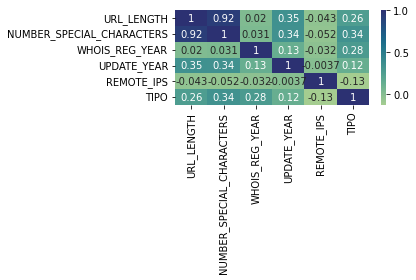

In [72]:
graphs.buildCorrHeatMap(processedDf,[])

<AxesSubplot:xlabel='TIPO', ylabel='NUMBER_SPECIAL_CHARACTERS'>

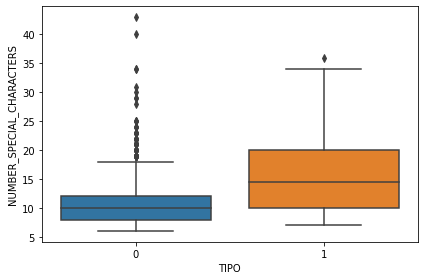

In [97]:
# 'Maligna': 1, 'Benigna': 0x
# URL_LENGTH                   0.260268
# graphs.buildBoxPlot(processedDf,"TIPO","URL_LENGTH")
# NUMBER_SPECIAL_CHARACTERS    0.338182
graphs.buildBoxPlot(processedDf,"TIPO","NUMBER_SPECIAL_CHARACTERS")
# WHOIS_REG_YEAR               0.278828
# graphs.buildBoxPlot(processedDf,"TIPO","WHOIS_REG_YEAR")
# UPDATE_YEAR                  0.124868
# graphs.buildBoxPlot(processedDf,"TIPO","UPDATE_YEAR")
# REMOTE_IPS                  -0.129607
# graphs.buildBoxPlot(processedDf,"TIPO","REMOTE_IPS")

array([[<AxesSubplot:title={'center':'URL_LENGTH'}>,
        <AxesSubplot:title={'center':'NUMBER_SPECIAL_CHARACTERS'}>],
       [<AxesSubplot:title={'center':'WHOIS_REG_YEAR'}>,
        <AxesSubplot:title={'center':'UPDATE_YEAR'}>],
       [<AxesSubplot:title={'center':'REMOTE_IPS'}>,
        <AxesSubplot:title={'center':'TIPO'}>]], dtype=object)

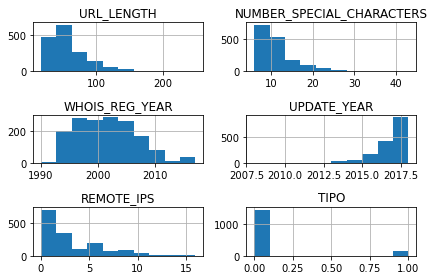

In [74]:
graphs.buildHistogram(processedDf)

In [75]:
# dataset_with_dummies = pd.get_dummies(processedDf,prefix_sep='--')
# dataset_with_dummies.to_csv('processedDf.csv')
preProcessor.saveData(processedDf,'processedDf')

<h1>Classifier Building</h1>

In [76]:
df=preProcessor.readFile('processedDf.csv')

In [77]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [78]:
df.shape

(1611, 1142)

In [79]:
preProcessor.showHead(df)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,WHOIS_REG_YEAR,UPDATE_YEAR,REMOTE_IPS,TIPO,WHOIS_COUNTRY--AT,WHOIS_COUNTRY--AU,WHOIS_COUNTRY--BE,WHOIS_COUNTRY--BG,...,DOMAIN_NAME--yelp.ca,DOMAIN_NAME--yelp.com,DOMAIN_NAME--ynn.com,DOMAIN_NAME--yolasite.com,DOMAIN_NAME--yourbittorrent.com,DOMAIN_NAME--youtube.com,DOMAIN_NAME--ysusports.com,DOMAIN_NAME--zenfolio.com,DOMAIN_NAME--zillow.com,DOMAIN_NAME--zimbio.com
0,17,6,1997,2013,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,6,1996,2017,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,7,2017,2017,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,6,2002,2016,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19,6,1997,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
preProcessor.showTail(df)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,WHOIS_REG_YEAR,UPDATE_YEAR,REMOTE_IPS,TIPO,WHOIS_COUNTRY--AT,WHOIS_COUNTRY--AU,WHOIS_COUNTRY--BE,WHOIS_COUNTRY--BG,...,DOMAIN_NAME--yelp.ca,DOMAIN_NAME--yelp.com,DOMAIN_NAME--ynn.com,DOMAIN_NAME--yolasite.com,DOMAIN_NAME--yourbittorrent.com,DOMAIN_NAME--youtube.com,DOMAIN_NAME--ysusports.com,DOMAIN_NAME--zenfolio.com,DOMAIN_NAME--zillow.com,DOMAIN_NAME--zimbio.com
1606,194,16,2008,2017,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1607,198,17,2008,2017,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1608,201,34,1999,2017,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1609,234,34,1998,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1610,249,40,2008,2017,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X = df.drop('TIPO',axis=1) #Predictors
y = df['TIPO'] #Outcomes

In [82]:
df.isnull().values.any()

False

In [83]:
classifier = ['Random Forest', 'XG Boost']
accuracy = [0,0]

<h5>Random Forest</h5>

In [84]:
X_train, X_test, y_train, y_test = modelBuilder.splitData(X,y)

In [85]:
rf = modelBuilder.forestClassifier()
rf = modelBuilder.fit(rf,X_train,y_train)

Training Accuracy Score: 0.9858030168589175


In [86]:
y_pred = modelBuilder.predict(rf,X_test)

In [87]:
modelBuilder.testScores(rf,X_test,y_test)
accuracy[0] = rf.score(X_train, y_train)

Test results:

Accuracy Score: 0.9711

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       443
           1       1.00      0.66      0.79        41

    accuracy                           0.97       484
   macro avg       0.98      0.83      0.89       484
weighted avg       0.97      0.97      0.97       484


Confusion Matrix:
[[443   0]
 [ 14  27]]



In [88]:
rfImpFeatures = modelBuilder.printImpFeature(rf,X)

DOMAIN_NAME 0.29216769084855854
WHOIS_COUNTRY 0.22396098681957521
WHOIS_STATE_CITY 0.22278797377887344
WHOIS_REG_YEAR 0.07816393677317726
URL_LENGTH 0.057203274651996074
NUMBER_SPECIAL_CHARACTERS 0.051480895459023616
REMOTE_IPS 0.0511183920221953
UPDATE_YEAR 0.0231168496466001


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

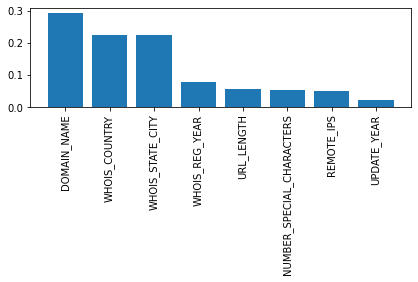

In [89]:
x,y = preProcessor.extractXY(rfImpFeatures)
graphs.buildBarPlot(x, y)

<h5>XG Boost</h5>

In [90]:
xgb = modelBuilder.xgClassifier()
xgb = modelBuilder.fit(xgb,X_train,y_train)

Training Accuracy Score: 0.9991126885536823


In [91]:
y_pred = modelBuilder.predict(xgb,X_test)

In [92]:
modelBuilder.testScores(xgb,X_test,y_test)
accuracy[1] = xgb.score(X_train, y_train)

Test results:

Accuracy Score: 0.9752

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       443
           1       0.91      0.78      0.84        41

    accuracy                           0.98       484
   macro avg       0.95      0.89      0.91       484
weighted avg       0.97      0.98      0.97       484


Confusion Matrix:
[[440   3]
 [  9  32]]



In [93]:
xgImpFeatures = modelBuilder.printImpFeature(xgb,X)

WHOIS_COUNTRY 0.51755583
DOMAIN_NAME 0.22828016
WHOIS_STATE_CITY 0.2268149
REMOTE_IPS 0.008247143
NUMBER_SPECIAL_CHARACTERS 0.006378401
URL_LENGTH 0.004958408
WHOIS_REG_YEAR 0.004862422
UPDATE_YEAR 0.0029027401


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

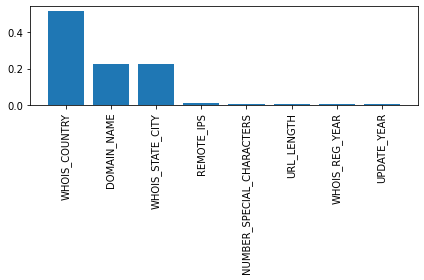

In [94]:
x,y = preProcessor.extractXY(xgImpFeatures)
graphs.buildBarPlot(x, y)

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

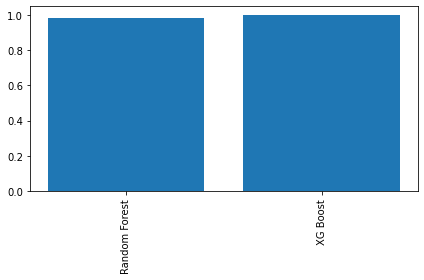

In [95]:
graphs.buildBarPlot(classifier, accuracy)